In [5]:
%%capture
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pickle

In [ ]:
import sys
import os
ECHOGRAM_DIR = os.path.dirname(os.path.relpath("../side_scan_sonar_jupyter_notebooks", start=os.curdir))
print(ECHOGRAM_DIR)
sys.path.append(os.path.dirname(ECHOGRAM_DIR))

In [6]:
from echogram import EchoGram

# Force sensor and objects testing

  0%|          | 0.00/332M [00:00<?, ?B/s]

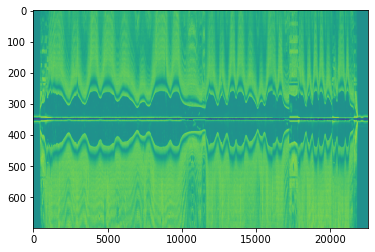

In [3]:
echo_1_051722 = EchoGram('./log-data/Sonar_2022-05-17_13.01.43.sl2', channels=[5])

  0%|          | 0.00/119M [00:00<?, ?B/s]

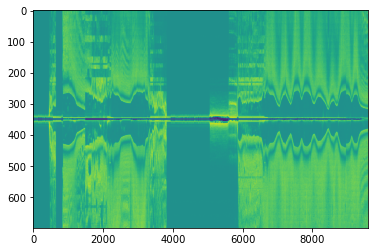

In [4]:
echo_2_051722 = EchoGram('./log-data/Sonar_2022-05-17_13.26.21.sl2', channels=[5])

In [5]:
print(echo_1_051722.df.columns)

Index(['offset', 'previous_primary_offset', 'previous_secondary_offset',
       'previous_downscan_offset', 'previous_left_sidescan_offset',
       'previous_right_sidescan_offset', 'previous_composite_sidescan_offset',
       'framesize', 'previous_framesize', 'channel', 'packetsize',
       'frame_index', 'upper_limit', 'lower_limit', 'frequency', 'water_depth',
       'keel_depth', 'gps_speed', 'temperature', 'lon_enc', 'lat_enc',
       'water_speed', 'course', 'altitude', 'heading', 'flags', 'time1',
       'has_altitude', 'has_heading', 'has_track', 'has_water_speed',
       'has_position', 'has_packet', 'has_temperature', 'has_gps_speed',
       'gps_speed_kph', 'longitude', 'latitude', 'water_depth_m', 'headersize',
       'heading_deg', 'X_m', 'Y_m'],
      dtype='object')


In [6]:
print("Checking the echo_1_051722 variable exists. Type: ", type(echo_1_051722))   
with open('processed_data/echo_1_051722.txt', 'wb') as fl:  
    pickle.dump(echo_1_051722, fl)
print("Checking the echo_2_051722 variable exists. Type: ", type(echo_2_051722))   
with open('processed_data/echo_2_051722.txt', 'wb') as fl:  
    pickle.dump(echo_2_051722, fl)

Checking the echo_1_051722 variable exists. Type:  <class 'echogram.EchoGram'>
Checking the echo_2_051722 variable exists. Type:  <class 'echogram.EchoGram'>


In [3]:
with open('processed_data/echo_1_051722.txt', 'rb') as fl:
    echo_1_051722 = pickle.load(fl)
with open('processed_data/echo_2_051722.txt', 'rb') as fl:
    echo_2_051722 = pickle.load(fl)

In [7]:
import copy
echo_3_051722 = copy.deepcopy(echo_1_051722)
echo_6_051722 = copy.deepcopy(echo_1_051722)
echo_9_051722 = copy.deepcopy(echo_1_051722)
echo_12_051722 = copy.deepcopy(echo_2_051722)

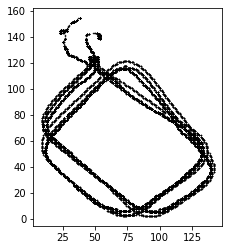

In [9]:
echo_1_051722.see_range([10000, 10])

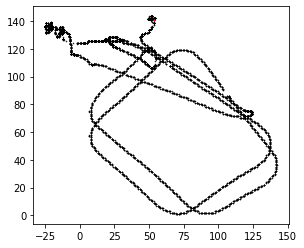

In [10]:
echo_2_051722.see_range([0, 10])

In [11]:
echo_3_051722.crop_data(0, 800) 
echo_3_051722.crop_data(-1, 9100 - len(echo_3_051722.df), -1) 

In [12]:
echo_6_051722.crop_data(0, 11700) 
echo_6_051722.crop_data(-1, 5200 - len(echo_6_051722.df), -1) 

In [13]:
echo_9_051722.crop_data(0, 11700 + 5200) 
echo_9_051722.crop_data(0, 1000) 
echo_9_051722.crop_data(-1, 3450 - len(echo_9_051722.df), -1) 

In [14]:
echo_12_051722.crop_data(0, 6700)

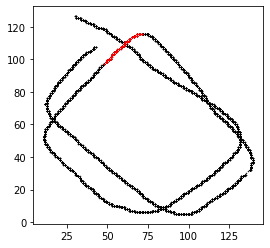

In [26]:
echo_3_051722.see_range([4500, 4900])

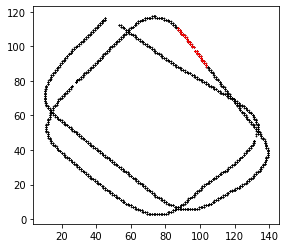

In [37]:
echo_6_051722.see_range([2800, 3000])

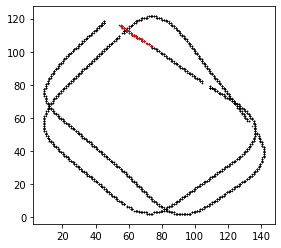

In [14]:
echo_9_051722.see_range([1,100])

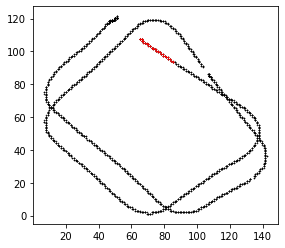

In [15]:
echo_12_051722.see_range([0, 100])

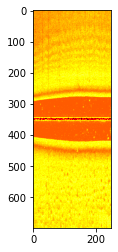

In [40]:
# checking for objects
image_start = 2750
image_end = 3000
plt.imshow(echo_6_051722.echo[:,image_start:image_end], cmap='hot')

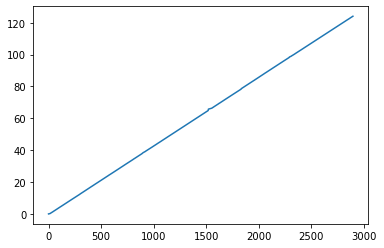

In [16]:
def fix_time(df):
    return df['time1'] - df['time1'].to_numpy()[0]

for df in [echo_3_051722.df, echo_6_051722.df, echo_9_051722.df, echo_12_051722.df]:
    df['time1'] = fix_time(df)/1000

plt.plot(range(len(echo_12_051722.df)), echo_12_051722.df['time1'])

In [19]:
header = ["X_m", "Y_m", "time1"]
echo_3_051722.df.to_csv('force_traj_3.csv', columns = header)
echo_6_051722.df.to_csv('force_traj_6.csv', columns = header)
echo_9_051722.df.to_csv('force_traj_9.csv', columns = header)
echo_12_051722.df.to_csv('force_traj_12.csv', columns = header)

in the terminal: `mv ./force_traj_* ~/april_ws/src/bathydrone/gnc/traj_data`

### Read the drone trajectory from csv

In [44]:
drone1 = pd.read_csv('./log-data/May-17th-2022-03-12PM-Flight-Airdata.csv')
drone2 = pd.read_csv('./log-data/May-17th-2022-03-47PM-Flight-Airdata.csv')

In [141]:
print(drone3mph.columns)

Index(['time(millisecond)', 'datetime(utc)', 'latitude', 'longitude',
       'height_above_takeoff(feet)',
       'height_above_ground_at_drone_location(feet)',
       'ground_elevation_at_drone_location(feet)',
       'altitude_above_seaLevel(feet)', 'height_sonar(feet)', 'speed(mph)',
       'distance(feet)', 'mileage(feet)', 'satellites', 'gpslevel',
       'voltage(v)', 'max_altitude(feet)', 'max_ascent(feet)',
       'max_speed(mph)', 'max_distance(feet)', ' xSpeed(mph)', ' ySpeed(mph)',
       ' zSpeed(mph)', ' compass_heading(degrees)', ' pitch(degrees)',
       ' roll(degrees)', 'isPhoto', 'isVideo', 'rc_elevator', 'rc_aileron',
       'rc_throttle', 'rc_rudder', 'rc_elevator(percent)',
       'rc_aileron(percent)', 'rc_throttle(percent)', 'rc_rudder(percent)',
       'gimbal_heading(degrees)', 'gimbal_pitch(degrees)', 'battery_percent',
       'voltageCell1', 'voltageCell2', 'voltageCell3', 'voltageCell4',
       'voltageCell5', 'voltageCell6', 'current(A)', 'battery_temperatu

In [23]:
def see_range(df, range, x = 'longitude', y = 'latitude'):
        fig, ax = plt.subplots()
        ax.plot(df[x], df[y], 'ko', ms=0.5)
        ax.plot(df[x].to_numpy()[range[0]:range[1]], df[y].to_numpy()[range[0]:range[1]], 'ro', ms=0.5)
        ax.set_aspect('equal')

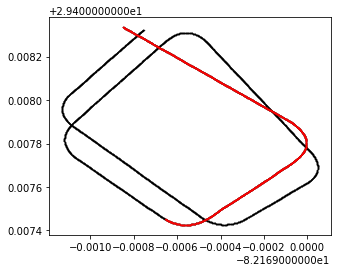

In [181]:
see_range(drone3mph, [0,1150])

In [ ]:
def lat_lon_to_meters(df, lon, lat, x0=-9147145.64754388, y0=3427601.097538607):
    R =  6378137.0
    Y = np.log(np.tan(np.pi / 4 + np.radians(lat) / 2)) * R
    X = np.radians(lon) * R
    df["X_m"] = X - x0
    df["Y_m"] = Y - y0

In [45]:
lat_lon_to_meters(drone1, drone1['longitude'], drone1['latitude'])
lat_lon_to_meters(drone2, drone2['longitude'], drone2['latitude'])

In [185]:
import copy
drone3mph = copy.deepcopy(drone1)
drone6mph = copy.deepcopy(drone1)
drone9mph = copy.deepcopy(drone1)
drone12mph = copy.deepcopy(drone2)

In [186]:
def crop_df(df, start, end, step=1):
    return df.drop(df.index[range(start, end, step)])

In [187]:
drone3mph = crop_df(drone3mph, 0, 500, step=1)
drone3mph = crop_df(drone3mph, -1, 3900 - len(drone3mph), -1)

In [188]:
drone6mph = crop_df(drone6mph, 0, 500+3900+720, step=1)
drone6mph = crop_df(drone6mph, -1, 2250 - len(drone6mph), -1)

In [189]:
drone9mph = crop_df(drone9mph, 0, 500+3900+720+2250+400, step=1)
drone9mph = crop_df(drone9mph, -1, 1510 - len(drone9mph), -1)

In [190]:
drone12mph = crop_df(drone12mph, 0, 830, step=1)
drone12mph = crop_df(drone12mph, -1, 1150 - len(drone12mph), -1)

To fix time, remove the intial time and divide by 1000 because time is in miliseconds

In [192]:
def fix_time(df):
    return (df["time"] - df["time"].to_numpy()[0])/1000

# for df in [drone3mph, drone6mph, drone9mph, drone12mph]:
drone3mph = drone3mph.rename(columns={"time(millisecond)": 'time'})
drone6mph = drone6mph.rename(columns={"time(millisecond)": 'time'})
drone9mph = drone9mph.rename(columns={"time(millisecond)": 'time'})
drone12mph = drone12mph.rename(columns={"time(millisecond)": 'time'})
drone3mph["time"] = fix_time(drone3mph)
drone6mph["time"] = fix_time(drone6mph)
drone9mph["time"] = fix_time(drone9mph)
drone12mph["time"] = fix_time(drone12mph)

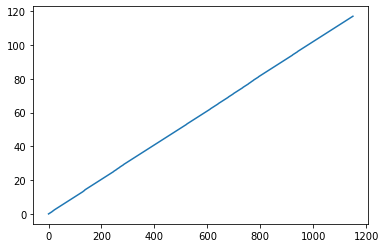

In [196]:
plt.plot(range(len(drone12mph)),drone12mph["time"])

In [197]:
header = ["X_m", "Y_m", "time"]
drone3mph.to_csv('drone_traj_3.csv', columns = header)
drone6mph.to_csv('drone_traj_6.csv', columns = header)
drone9mph.to_csv('drone_traj_9.csv', columns = header)
drone12mph.to_csv('drone_traj_12.csv', columns = header)

in the terminal: `mv ./drone_traj_* ~/april_ws/src/bathydrone/gnc/traj_data`

## Object Detection testing 2 ( 2022)

  0%|          | 0.00/378M [00:00<?, ?B/s]

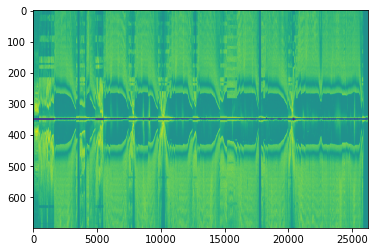

In [8]:
echo_1_072122 = EchoGram('./log-data/objects2/Sonar_2022-07-21_12.38.57.sl2', channels=[5])

  0%|          | 0.00/449M [00:00<?, ?B/s]

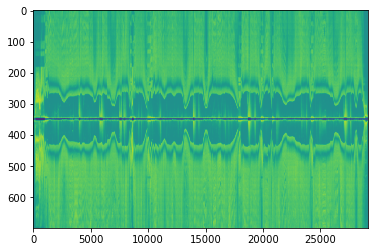

In [5]:
echo_2_072122 = EchoGram('./log-data/objects2/Sonar_2022-07-21_13.53.33.sl2', channels=[5])

In [9]:
print("Checking the echo_1_072122 variable exists. Type: ", type(echo_1_072122))   
with open('processed_data/echo_1_072122.txt', 'wb') as fl:  
    pickle.dump(echo_1_072122, fl)
print("Checking the echo_2_072122 variable exists. Type: ", type(echo_2_072122))   
with open('processed_data/echo_2_072122.txt', 'wb') as fl:  
    pickle.dump(echo_2_072122, fl)

Checking the echo_1_072122 variable exists. Type:  <class 'echogram.EchoGram'>
Checking the echo_2_072122 variable exists. Type:  <class 'echogram.EchoGram'>
